# Biomarkers On Brains

## By Cooper Mellema

### This program plots discovered biomarkers on MNIST standard brains

In [1]:
!pip install --upgrade nilearn

Requirement already up-to-date: nilearn in /project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAuttfGPUv3/lib/python3.6/site-packages (0.5.2)


In [2]:
import nilearn
import numpy as np
import pickle as pkl
from nilearn import plotting
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.input_data import NiftiSpheresMasker

In [3]:
dBASC=datasets.fetch_atlas_basc_multiscale_2015(version='sym')
sBASC122=dBASC['scale122']

In [4]:
dir(nilearn.plotting)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_set_mpl_backend',
 'cm',
 'displays',
 'edge_detect',
 'find_cut_slices',
 'find_cuts',
 'find_parcellation_cut_coords',
 'find_probabilistic_atlas_cut_coords',
 'find_xyz_cut_coords',
 'glass_brain',
 'html_connectome',
 'html_stat_map',
 'html_surface',
 'img_plotting',
 'js_plotting_utils',
 'matrix_plotting',
 'plot_anat',
 'plot_connectome',
 'plot_epi',
 'plot_glass_brain',
 'plot_img',
 'plot_matrix',
 'plot_prob_atlas',
 'plot_roi',
 'plot_stat_map',
 'plot_surf',
 'plot_surf_roi',
 'plot_surf_stat_map',
 'show',
 'surf_plotting',
 'view_connectome',
 'view_img',
 'view_img_on_surf',
 'view_markers',
 'view_surf']

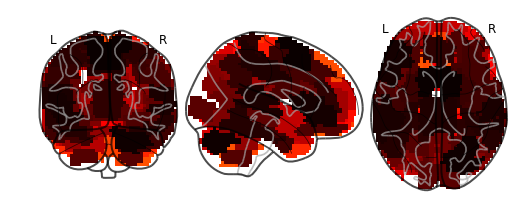

In [71]:
sAtlasLoc='/home2/s169682/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale122.nii.gz'
plotting.plot_glass_brain(sAtlasLoc)

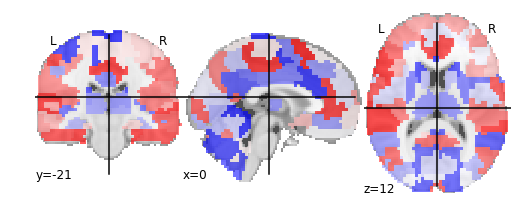

In [69]:
plotting.plot_roi(sAtlasLoc, cmap=plotting.cm.bwr)

In [18]:
# sFMRIFile='/project/bioinformatics/DLLab/STUDIES/EMBARC/MDD/Preprocessed/CONN_week0_schaefer/dataset/sub-0001/ses-0001/func/wausub-0001_ses-0001_task-rest_bold.nii'
masker = NiftiLabelsMasker(labels_img=sBASC122, standardize=True)
coordinates=nilearn.plotting.find_parcellation_cut_coords(labels_img=sAtlasLoc)

In [34]:
coordinates

array([[ -8.23170732, -25.2195122 ,  74.75609756],
       [-14.04545455,  22.18181818,  -2.06818182],
       [ -8.625     , -45.04375   ,  -8.6375    ],
       [-48.23300971, -65.33980583,  33.46116505],
       [-10.43181818, -13.88636364,  52.59090909],
       [ -6.79787234,  21.32446809,  28.28723404],
       [-41.12571429,  17.72857143,  39.99142857],
       [-40.99126638, -22.61572052,  61.90393013],
       [ -5.81818182, -75.63636364, -34.18181818],
       [-17.66911765,   4.66911765,  17.34558824],
       [ -7.20512821, -63.20512821, -38.8974359 ],
       [-38.97368421,  12.        ,  -8.10526316],
       [-19.91752577,   4.61340206,  -3.17525773],
       [ -8.07518797, -55.38345865, -56.4962406 ],
       [ 53.81879195, -53.24832215,  17.68120805],
       [-16.03846154, -96.34615385,  14.01923077],
       [ -5.40425532, -52.04255319,  25.85106383],
       [-28.67088608, -77.97468354, -50.4556962 ],
       [-19.45754717, -64.31132075,   8.28773585],
       [ 38.66367713, -52.67264

In [82]:
aSynthetic=np.zeros((122,122))

# aSynthetic[16-1,60-1]=0.000266
# aSynthetic[34-1,105-1]=0.000246
# aSynthetic[33-1,110-1]=0.000238
# aSynthetic[2-1,15-1]=0.000179
# aSynthetic[18-1,73-1]=0.000172
# aSynthetic[16-1,120-1]=0.000159

aSynthetic[16-1,60-1]=10.145904
aSynthetic[34-1,105-1]=9.381839
aSynthetic[33-1,110-1]=9.073274
aSynthetic[2-1,15-1]=6.8471999
aSynthetic[18-1,73-1]=6.568022
aSynthetic[16-1,120-1]=6.061094


for i in range(122):
    for j in range(122):
        aSynthetic[j,i]=aSynthetic[i,j]

aSynthetic   

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
aUnique=np.unique(np.append(np.nonzero(aSynthetic)[0],np.nonzero(aSynthetic)[1]))
aSyntheticNonzero=aSynthetic[aUnique,:]
aSyntheticNonzero=aSyntheticNonzero[:,aUnique]
aSyntheticNonzero

array([[ 0.       ,  6.8471999,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [ 6.8471999,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       , 10.145904 ,  0.       ,  0.       ,  0.       ,
         6.061094 ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  6.568022 ,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  9.073274 ,
         0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  9.381839 ,  0.       ,
         0.       ],
       [ 0.       ,  0.       , 10.145904 ,  0.       ,  0

In [84]:
NonzeroCoordinates=coordinates[aUnique]
NonzeroCoordinates

array([[-14.04545455,  22.18181818,  -2.06818182],
       [ 53.81879195, -53.24832215,  17.68120805],
       [-16.03846154, -96.34615385,  14.01923077],
       [-28.67088608, -77.97468354, -50.4556962 ],
       [-52.46226415, -57.3490566 ,  17.49056604],
       [ -7.79617834,  31.08280255,  39.78980892],
       [-29.69784173, -93.77338129,   0.51438849],
       [ 37.27317073, -20.67560976,  59.74146341],
       [-45.36752137,  20.36324786,  21.65811966],
       [-57.41860465,  -5.52325581,  30.59883721],
       [-48.61918605,  28.0494186 ,  -0.45639535]])

In [85]:
aUnique

array([  1,  14,  15,  17,  32,  33,  59,  72, 104, 109, 119])

In [86]:
array([[-14.04545455,  22.18181818,  -2.06818182], # L. Caudate
       [ 53.81879195, -53.24832215,  17.68120805], # R. BA39
       [-16.03846154, -96.34615385,  14.01923077], # L. visual association
       [-28.67088608, -77.97468354, -50.4556962 ], # Cerebellum, posterior lobe
       [-52.46226415, -57.3490566 ,  17.49056604], # L BA39
       [ -7.79617834,  31.08280255,  39.78980892], # L BA8
       [-29.69784173, -93.77338129,   0.51438849], # L. visual association
       [ 37.27317073, -20.67560976,  59.74146341], # R. Primary motor/ BA6 (intersection)
       [-45.36752137,  20.36324786,  21.65811966], # L. BA44
       [-57.41860465,  -5.52325581,  30.59883721], # L. BA6
       [-48.61918605,  28.0494186 ,  -0.45639535]]) # L. BA45

NameError: name 'array' is not defined

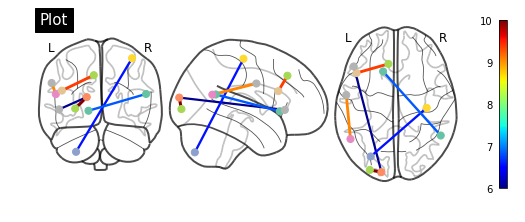

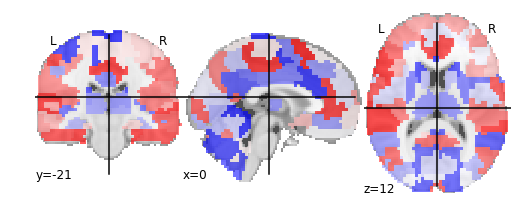

In [88]:
plotting.plot_connectome(aSyntheticNonzero, NonzeroCoordinates,
                         edge_vmin=6,
                         edge_vmax=10,
                         colorbar=True,
                         edge_cmap="jet",
                         title='Plot')
plotting.plot_roi(sAtlasLoc, cmap=plotting.cm.bwr)
plotting.show()